## Exploratory data analysis (EDA) - Manual

### By:
Jose R. Zapata

### Date:
2024-10-24

### Description:

Exploratory data analysis (EDA) and description of the data set.

Data manipulation and visualization


## 📚 Import  libraries

In [1]:
# base libraries for data science
import sys
from pathlib import Path

import pandas as pd

In [2]:
# configuration to show only 2 decimal places
pd.set_option("display.float_format", "{:.2f}".format)

In [3]:
# print library version for reproducibility

print("Python version: ", sys.version)
print("Pandas version: ", pd.__version__)

Python version:  3.11.10 (main, Sep 27 2024, 20:27:21) [GCC 11.4.0]
Pandas version:  2.1.4


## 💾 Load data

The dataset has correct data types, fixed in:

`notebooks/2-exploration/01-jrz-data_explore_description-2024_03_01.ipynb`

In [4]:
DATA_DIR = Path.cwd().resolve().parents[1] / "data"

titanic_df = pd.read_parquet(
    DATA_DIR / "02_intermediate/titanic_type_fixed.parquet", engine="pyarrow"
)

## 📊 Data description

### General data information

In [5]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   Unnamed: 0  1309 non-null   int64   
 1   pclass      1309 non-null   int64   
 2   survived    1309 non-null   bool    
 3   name        1309 non-null   object  
 4   sex         1309 non-null   category
 5   age         1046 non-null   float64 
 6   sibsp       1309 non-null   int64   
 7   parch       1309 non-null   int64   
 8   fare        1308 non-null   float64 
 9   embarked    1307 non-null   category
dtypes: bool(1), category(2), float64(2), int64(4), object(1)
memory usage: 75.8+ KB


Ordinal data has to be converted again

information about the pclass column can be chech in the notebook

`notebooks/2-exploration/01-jrz-data_explore_description-2024_03_01.ipynb`

In [6]:
titanic_df["pclass"] = pd.Categorical(
    titanic_df["pclass"], categories=[3, 2, 1], ordered=True
)

# column Unnamed: 0 is not needed
titanic_df = titanic_df.drop(columns=["Unnamed: 0"])

General information about the data set:

In [7]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   pclass    1309 non-null   category
 1   survived  1309 non-null   bool    
 2   name      1309 non-null   object  
 3   sex       1309 non-null   category
 4   age       1046 non-null   float64 
 5   sibsp     1309 non-null   int64   
 6   parch     1309 non-null   int64   
 7   fare      1308 non-null   float64 
 8   embarked  1307 non-null   category
dtypes: bool(1), category(3), float64(2), int64(2), object(1)
memory usage: 56.8+ KB


In [8]:
# size of the dataframe
titanic_df.shape

(1309, 9)

In [9]:
# sample of the dataframe
titanic_df.sample(5)

,pclass,survived,name,sex,age,sibsp,parch,fare,embarked
354,2,False,"Bryhl, Mr. Kurt Arnold Gottfrid",male,25.00,1,0,26.00,S
562,2,True,"Slayter, Miss. Hilda Mary",female,30.00,0,0,12.35,Q
816,3,False,"Gheorgheff, Mr. Stanio",male,NaN,0,0,7.90,C
1217,3,False,"Soholt, Mr. Peter Andreas Lauritz Andersen",male,19.00,0,0,7.65,S
1006,3,True,"McGovern, Miss. Mary",female,NaN,0,0,7.88,Q


Number of missing values

In [10]:
titanic_df.isnull().sum()

pclass        0
survived      0
name          0
sex           0
age         263
sibsp         0
parch         0
fare          1
embarked      2
dtype: int64

Target Variable = `Survived`

#### General statistics of the data set

##### Numerical variables

In [11]:
titanic_df.describe()

,age,sibsp,parch,fare
count,1046.00,1309.00,1309.00,1308.00
mean,29.88,0.50,0.39,33.30
std,14.41,1.04,0.87,51.76
min,0.17,0.00,0.00,0.00
25%,21.00,0.00,0.00,7.90
50%,28.00,0.00,0.00,14.45
75%,39.00,1.00,0.00,31.27
max,80.00,8.00,9.00,512.33


##### Categorical variables

In [12]:
# categorical columns description
titanic_df.describe(include="category")

,pclass,sex,embarked
count,1309,1309,1307
unique,3,2,3
top,3,male,S
freq,709,843,914


### 📈  Univariate Analysis

#### Target Variable

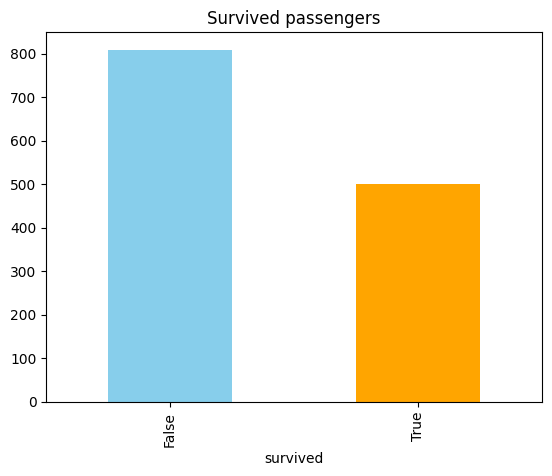

In [13]:
titanic_df["survived"].value_counts().plot(
    kind="bar", color=["skyblue", "orange"], title="Survived passengers"
);

#### Numerical Variables

In [14]:
# list of the numerical columns
numerical_columns = list(titanic_df.select_dtypes(include=["number"]).columns)
numerical_columns

['age', 'sibsp', 'parch', 'fare']

##### Age

In [15]:
column = "age"
titanic_df[column].describe()

count   1046.00
mean      29.88
std       14.41
min        0.17
25%       21.00
50%       28.00
75%       39.00
max       80.00
Name: age, dtype: float64

In [16]:
# number of unique values
titanic_df[column].nunique()

98

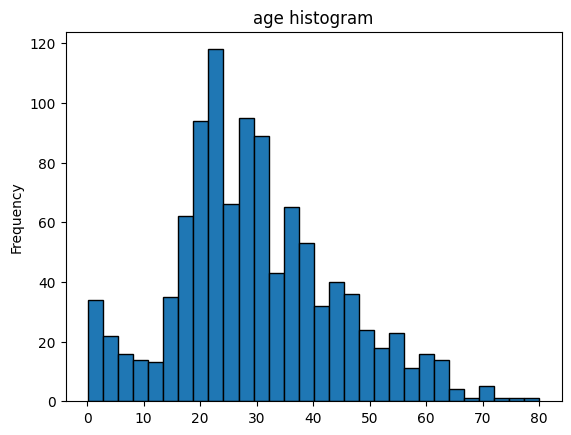

In [17]:
titanic_df[column].plot(
    kind="hist", bins=30, edgecolor="black", title=f"{column} histogram"
);

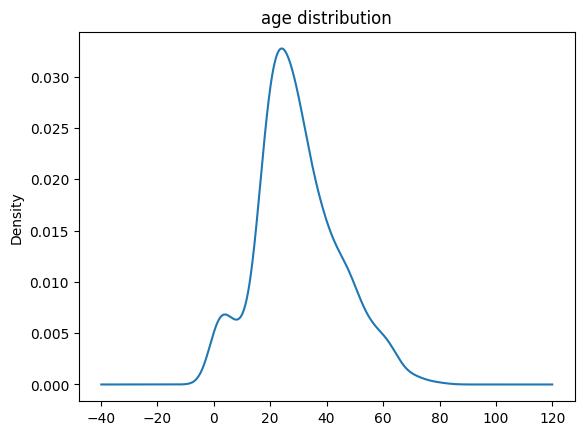

In [18]:
titanic_df[column].plot(kind="density", title=f"{column} distribution");

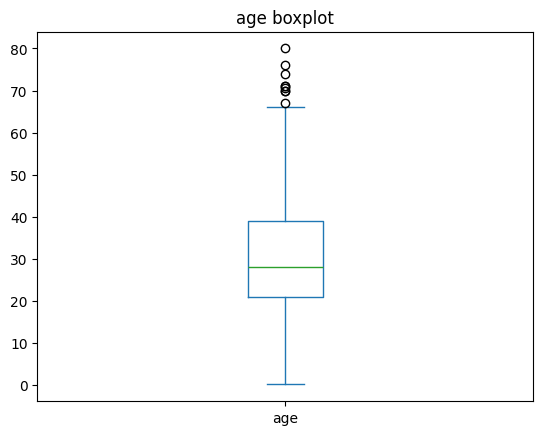

In [19]:
titanic_df[column].plot(kind="box", title=f"{column} boxplot");

##### sibsp

In [20]:
column = "sibsp"
titanic_df[column].describe()

count   1309.00
mean       0.50
std        1.04
min        0.00
25%        0.00
50%        0.00
75%        1.00
max        8.00
Name: sibsp, dtype: float64

In [21]:
# number of unique values
titanic_df[column].nunique()

7

In [22]:
# unique values (because are only a few)
titanic_df[column].unique()

array([0, 1, 2, 3, 4, 5, 8])

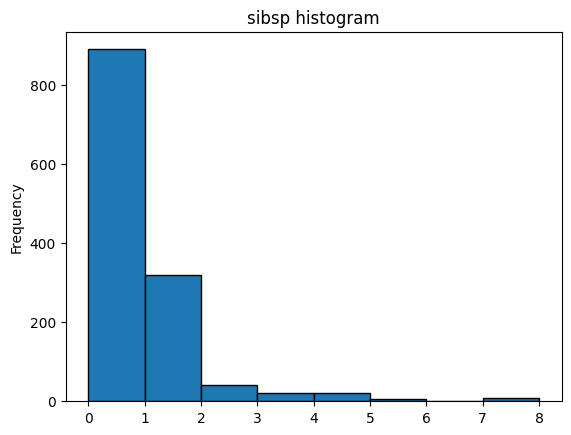

In [23]:
# histogram of a column with 7 unique values between 0 and 8
titanic_df[column].plot(
    kind="hist", bins=8, edgecolor="black", title=f"{column} histogram"
);

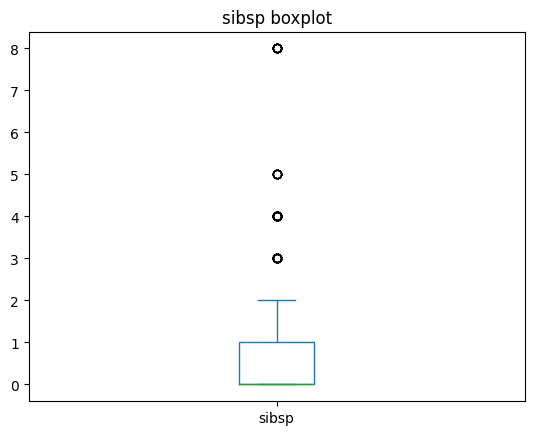

In [24]:
titanic_df[column].plot(kind="box", title=f"{column} boxplot");

##### parch

In [25]:
column = "parch"
titanic_df[column].describe()

count   1309.00
mean       0.39
std        0.87
min        0.00
25%        0.00
50%        0.00
75%        0.00
max        9.00
Name: parch, dtype: float64

In [26]:
# number of unique values

titanic_df[column].nunique()

8

In [27]:
# unique values (because are only a few)
titanic_df[column].unique()

array([0, 2, 1, 4, 3, 5, 6, 9])

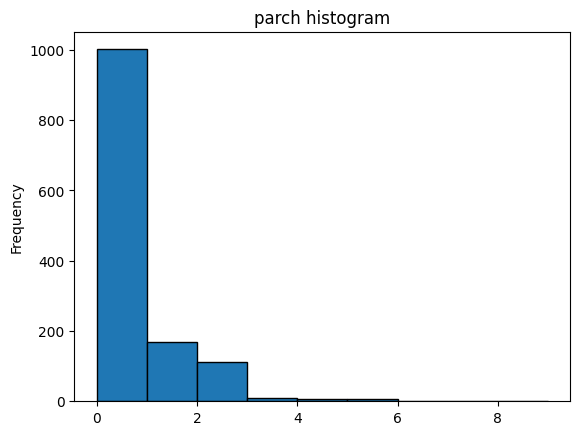

In [28]:
titanic_df[column].plot(
    kind="hist", bins=9, edgecolor="black", title=f"{column} histogram"
);

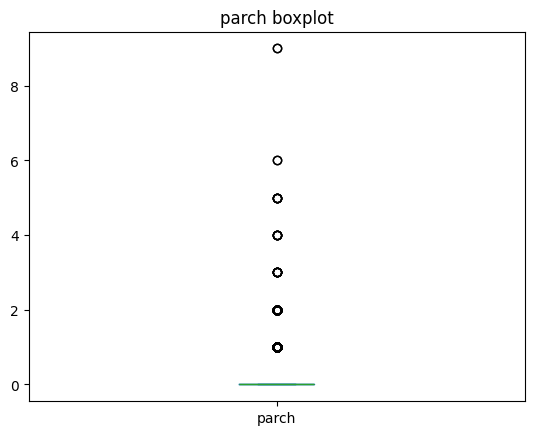

In [29]:
titanic_df[column].plot(kind="box", title=f"{column} boxplot");

##### fare

In [30]:
column = "fare"
titanic_df[column].describe()

count   1308.00
mean      33.30
std       51.76
min        0.00
25%        7.90
50%       14.45
75%       31.27
max      512.33
Name: fare, dtype: float64

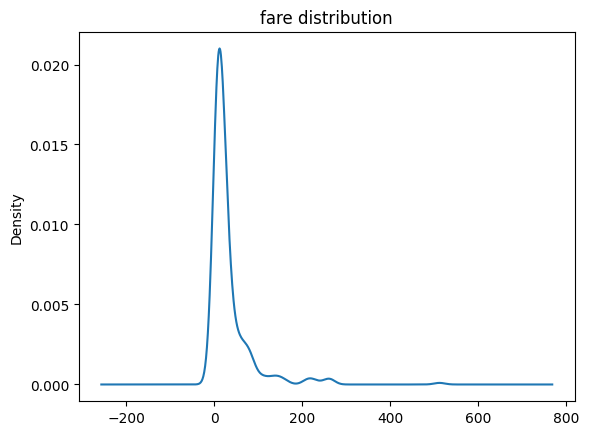

In [31]:
titanic_df[column].plot(kind="kde", title=f"{column} distribution");

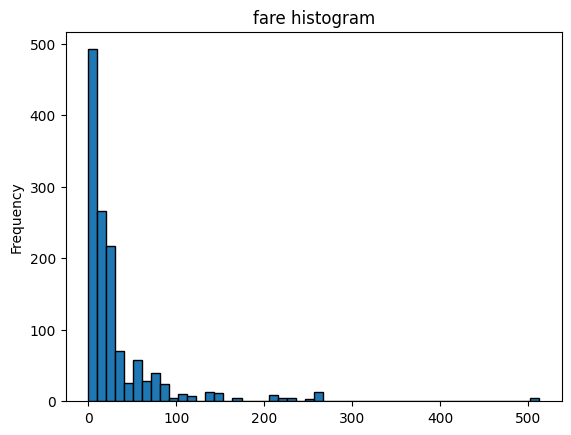

In [32]:
titanic_df[column].plot(
    kind="hist", bins=50, edgecolor="black", title=f"{column} histogram"
);

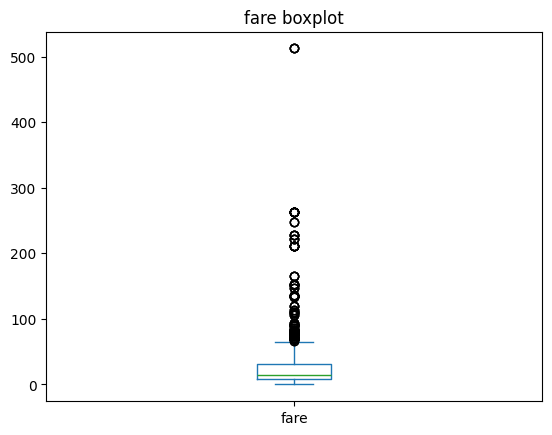

In [33]:
titanic_df[column].plot(kind="box", title=f"{column} boxplot");

#### Categorical Variables

In [34]:
# list of the categorical columns
categorical_columns = list(titanic_df.select_dtypes(include=["category"]).columns)
categorical_columns

['pclass', 'sex', 'embarked']

##### pclass

In [35]:
column = "pclass"
titanic_df[column].describe()

count     1309
unique       3
top          3
freq       709
Name: pclass, dtype: int64

In [36]:
titanic_df[column].unique()

[1, 2, 3]
Categories (3, int64): [3 < 2 < 1]

In [37]:
titanic_df[column].value_counts()

pclass
3    709
1    323
2    277
Name: count, dtype: int64

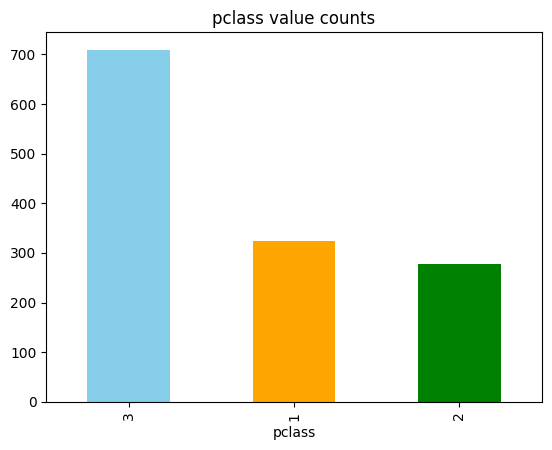

In [38]:
titanic_df[column].value_counts().plot(
    kind="bar", color=["skyblue", "orange", "green"], title=f"{column} value counts"
);

##### Sex

In [39]:
column = "sex"
titanic_df[column].describe()

count     1309
unique       2
top       male
freq       843
Name: sex, dtype: object

In [40]:
titanic_df[column].unique()

['female', 'male']
Categories (2, object): ['female', 'male']

In [41]:
titanic_df[column].value_counts()

sex
male      843
female    466
Name: count, dtype: int64

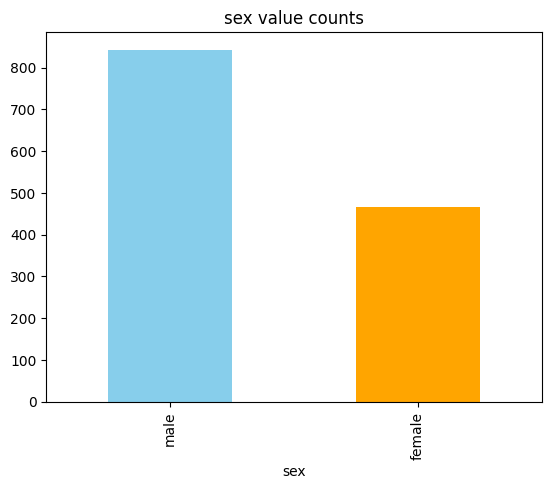

In [42]:
titanic_df[column].value_counts().plot(
    kind="bar", color=["skyblue", "orange"], title=f"{column} value counts"
);

##### embarked

In [43]:
column = "embarked"
titanic_df[column].describe()

count     1307
unique       3
top          S
freq       914
Name: embarked, dtype: object

In [44]:
titanic_df[column].unique()

['S', 'C', NaN, 'Q']
Categories (3, object): ['C', 'Q', 'S']

In [45]:
titanic_df[column].value_counts()

embarked
S    914
C    270
Q    123
Name: count, dtype: int64

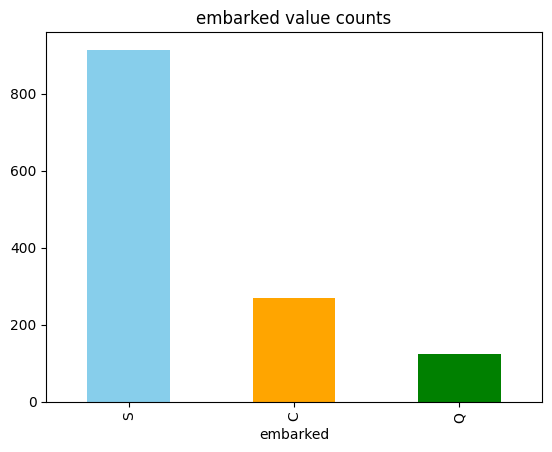

In [46]:
titanic_df[column].value_counts().plot(
    kind="bar", color=["skyblue", "orange", "green"], title=f"{column} value counts"
);

#### String columns

In [47]:
titanic_df["name"].sample(5)

1204                            Sivola, Mr. Antti Wilhelm
163     Holverson, Mrs. Alexander Oskar (Mary Aline To...
707                          Carlsson, Mr. August Sigfrid
828                           Goodwin, Miss. Jessie Allis
412                                  Fynney, Mr. Joseph J
Name: name, dtype: object

In [48]:
titanic_df["name"].nunique()

1307

### 📈  Bivariate Analysis

Is important to check the relationship between the target variable and the other variables.

The target variable is `Survived`


#### Target vs Numerical Variables

##### survived vs age

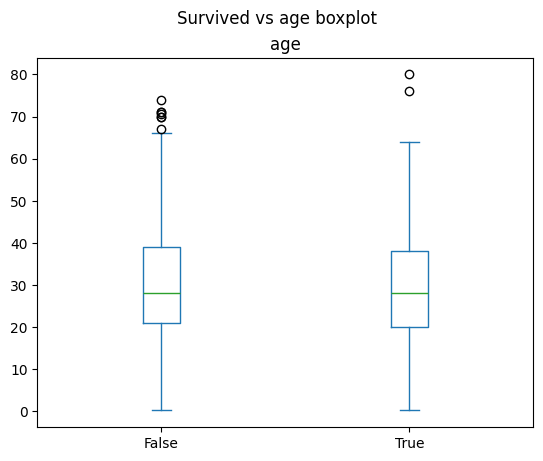

In [49]:
variable = "age"

titanic_df.plot(
    kind="box",
    column=variable,
    by="survived",
    grid=False,
    title=f"Survived vs {variable} boxplot",
);

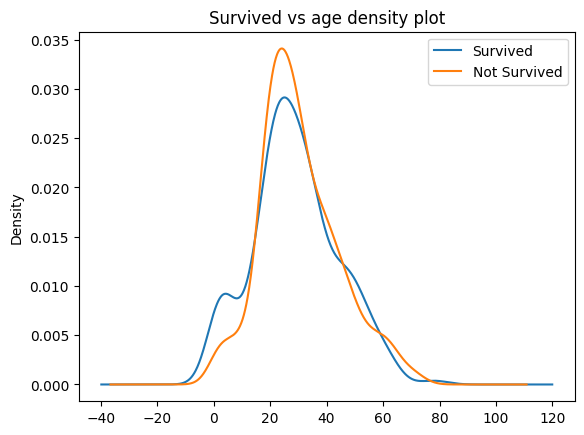

In [50]:
titanic_df[titanic_df["survived"] == 1][variable].plot(
    kind="kde",
    label="Survived",
    legend=True,
    title=f"Survived vs {variable} density plot",
)
titanic_df[titanic_df["survived"] == 0][variable].plot(
    kind="kde",
    label="Not Survived",
    legend=True,
    xlabel=variable,
    ylabel="Density",
);

##### survived vs sibsp

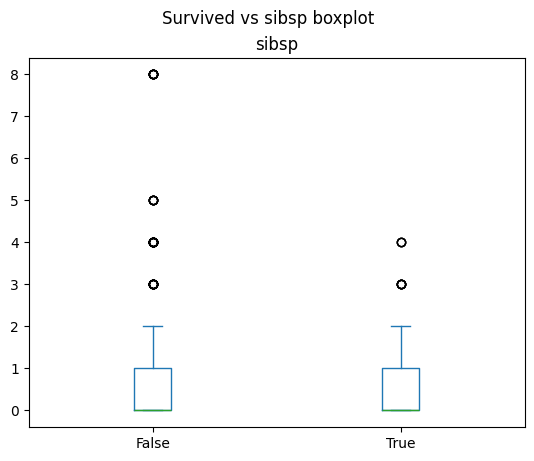

In [51]:
variable = "sibsp"

titanic_df.plot(
    kind="box",
    column=variable,
    by="survived",
    grid=False,
    title=f"Survived vs {variable} boxplot",
);

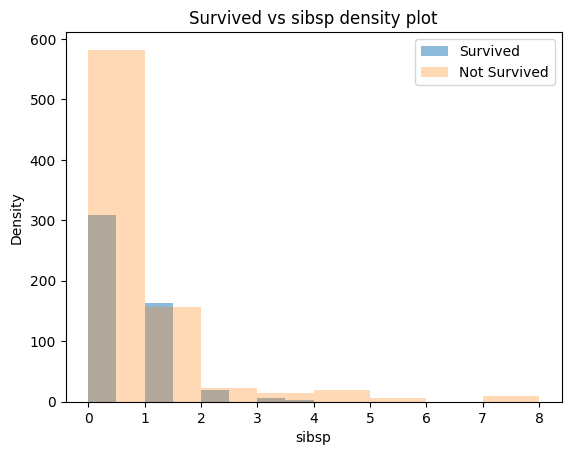

In [52]:
titanic_df[titanic_df["survived"] == 1][variable].plot(
    kind="hist",
    label="Survived",
    legend=True,
    bins=8,
    alpha=0.5,
    title=f"Survived vs {variable} density plot",
)
titanic_df[titanic_df["survived"] == 0][variable].plot(
    kind="hist",
    label="Not Survived",
    legend=True,
    bins=8,
    alpha=0.3,
    xlabel=variable,
    ylabel="Density",
);

##### survived vs parch

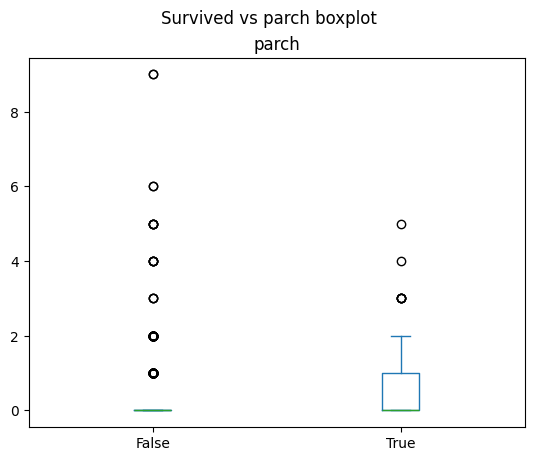

In [53]:
variable = "parch"

titanic_df.plot(
    kind="box",
    column=variable,
    by="survived",
    grid=False,
    title=f"Survived vs {variable} boxplot",
);

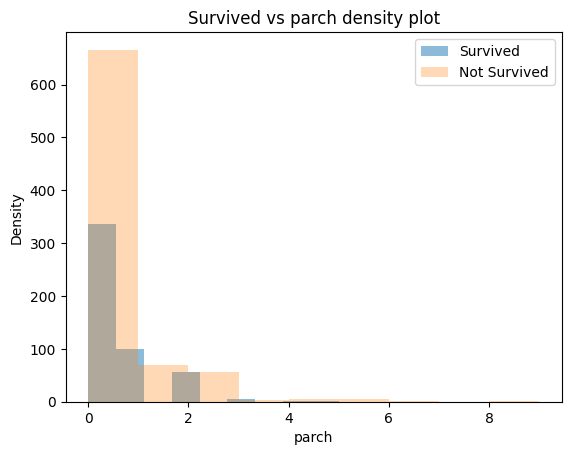

In [54]:
titanic_df[titanic_df["survived"] == 1][variable].plot(
    kind="hist",
    label="Survived",
    legend=True,
    bins=9,
    alpha=0.5,
    title=f"Survived vs {variable} density plot",
)
titanic_df[titanic_df["survived"] == 0][variable].plot(
    kind="hist",
    label="Not Survived",
    legend=True,
    bins=9,
    alpha=0.3,
    xlabel=variable,
    ylabel="Density",
);

##### survived vs fare

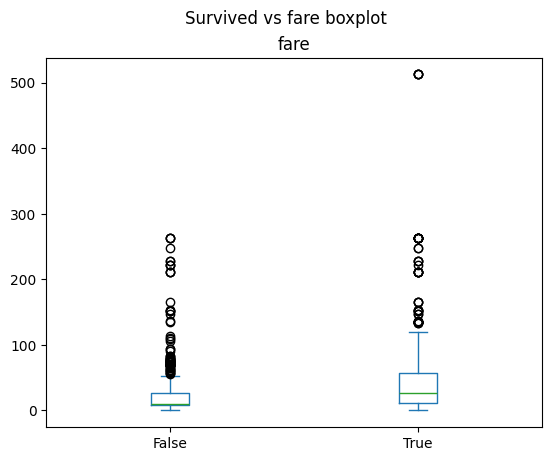

In [55]:
variable = "fare"

titanic_df.plot(
    kind="box",
    column=variable,
    by="survived",
    grid=False,
    title=f"Survived vs {variable} boxplot",
);

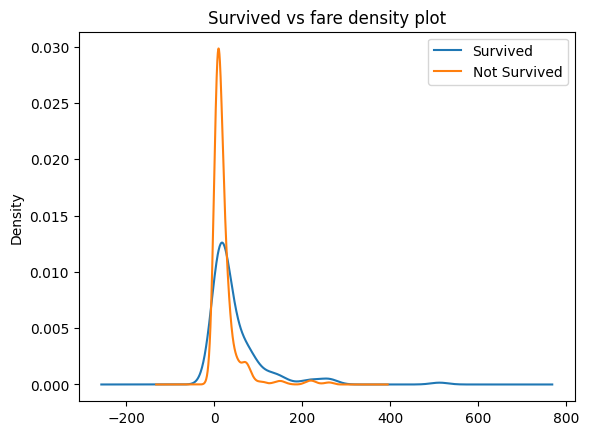

In [56]:
titanic_df[titanic_df["survived"] == 1][variable].plot(
    kind="kde",
    label="Survived",
    legend=True,
    title=f"Survived vs {variable} density plot",
)
titanic_df[titanic_df["survived"] == 0][variable].plot(
    kind="kde",
    label="Not Survived",
    legend=True,
    xlabel=variable,
    ylabel="Density",
);

#### Target vs Categorical Variables

##### survived vs pclass

In [57]:
column = "pclass"

(
    pd.crosstab(titanic_df[column], titanic_df["survived"], margins=True)
    .style.background_gradient(cmap="coolwarm")
    .set_caption("Survived vs Pclass Heatmap")
)

survived,False,True,All
pclass,,,
3,528,181,709
2,158,119,277
1,123,200,323
All,809,500,1309


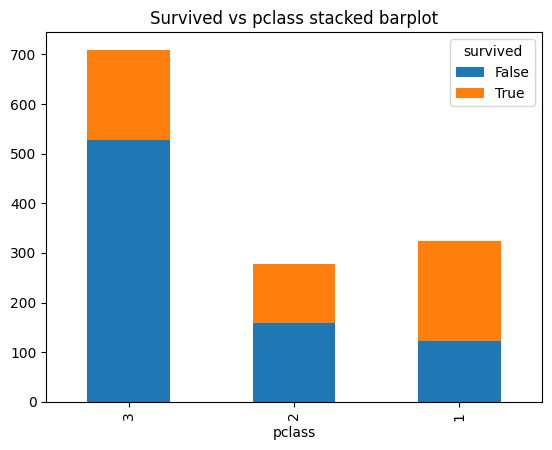

In [58]:
(
    pd.crosstab(titanic_df[column], titanic_df["survived"]).plot(
        kind="bar", stacked=True, title=f"Survived vs {column} stacked barplot"
    )
);

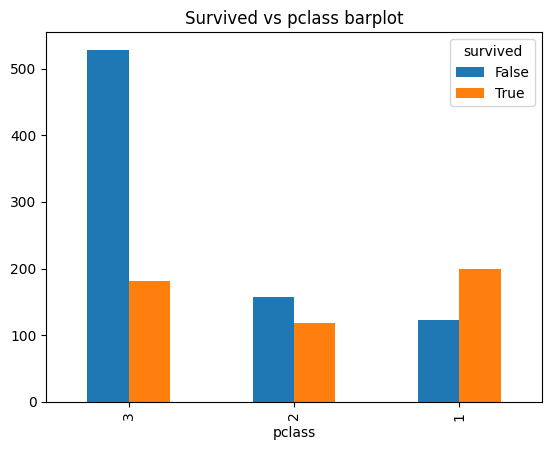

In [59]:
(
    pd.crosstab(titanic_df[column], titanic_df["survived"]).plot(
        kind="bar",
        title=f"Survived vs {column} barplot",
    )
);

##### survived vs sex

In [60]:
column = "sex"

(
    pd.crosstab(titanic_df[column], titanic_df["survived"], margins=True)
    .style.background_gradient(cmap="coolwarm")
    .set_caption("Survived vs Pclass Heatmap")
)

survived,False,True,All
sex,,,
female,127,339,466
male,682,161,843
All,809,500,1309


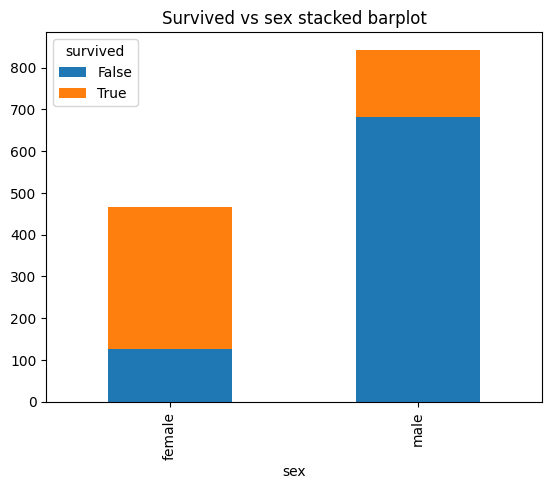

In [61]:
(
    pd.crosstab(titanic_df[column], titanic_df["survived"]).plot(
        kind="bar", stacked=True, title=f"Survived vs {column} stacked barplot"
    )
);

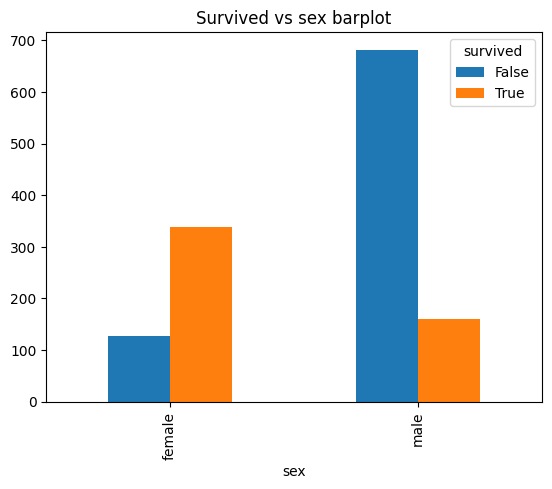

In [62]:
(
    pd.crosstab(titanic_df[column], titanic_df["survived"]).plot(
        kind="bar",
        title=f"Survived vs {column} barplot",
    )
);

##### survived vs embarked

In [63]:
column = "embarked"

(
    pd.crosstab(titanic_df[column], titanic_df["survived"], margins=True)
    .style.background_gradient(cmap="coolwarm")
    .set_caption("Survived vs Pclass Heatmap")
)

survived,False,True,All
embarked,,,
C,120,150,270
Q,79,44,123
S,610,304,914
All,809,498,1307


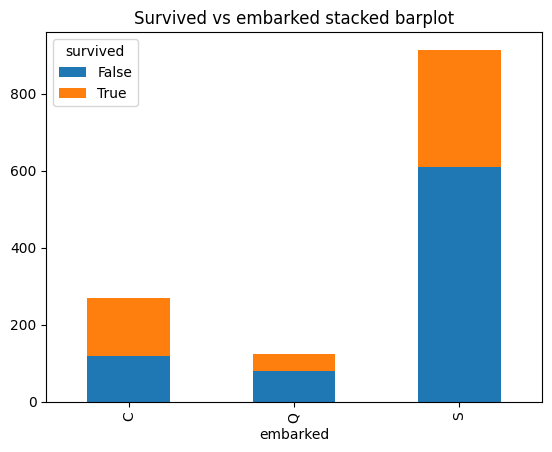

In [64]:
(
    pd.crosstab(titanic_df[column], titanic_df["survived"]).plot(
        kind="bar", stacked=True, title=f"Survived vs {column} stacked barplot"
    )
);

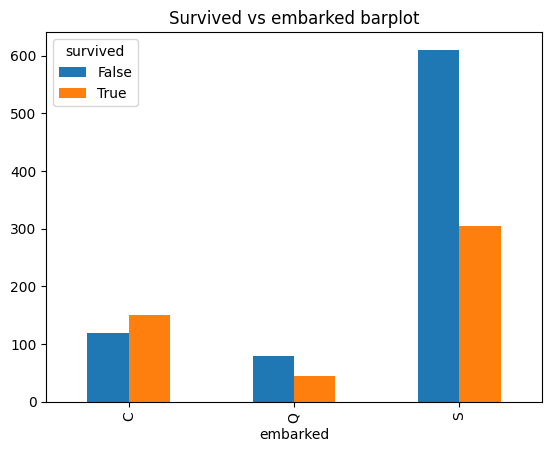

In [65]:
(
    pd.crosstab(titanic_df[column], titanic_df["survived"]).plot(
        kind="bar",
        title=f"Survived vs {column} barplot",
    )
);

#### Numerical vs Numerical Variables

##### age vs sibsp

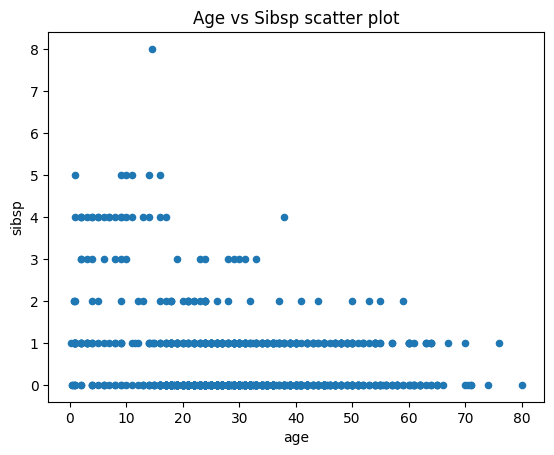

In [66]:
# scatter plot of age vs sibsp

titanic_df.plot(
    kind="scatter",
    x="age",
    y="sibsp",
    title="Age vs Sibsp scatter plot",
);

##### age vs parch

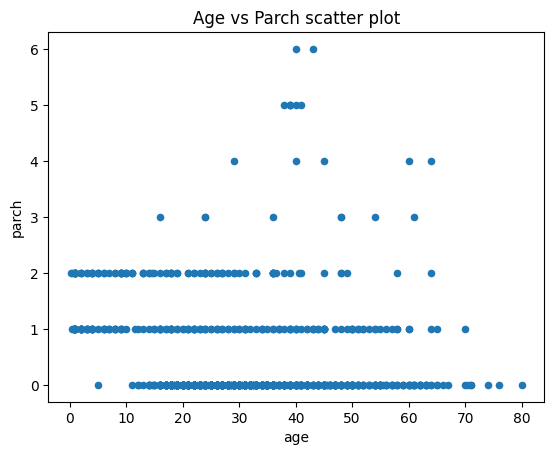

In [67]:
# scatter plot of age vs parch

titanic_df.plot(
    kind="scatter",
    x="age",
    y="parch",
    title="Age vs Parch scatter plot",
);

##### age vs fare

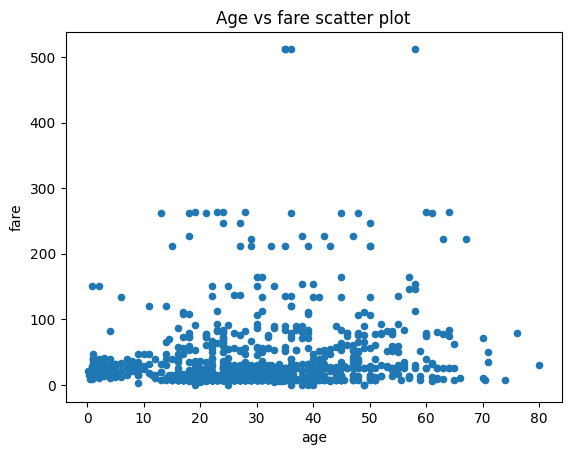

In [68]:
# scatter plot of age vs fare

titanic_df.plot(
    kind="scatter",
    x="age",
    y="fare",
    title="Age vs fare scatter plot",
);

##### sibsp vs parch

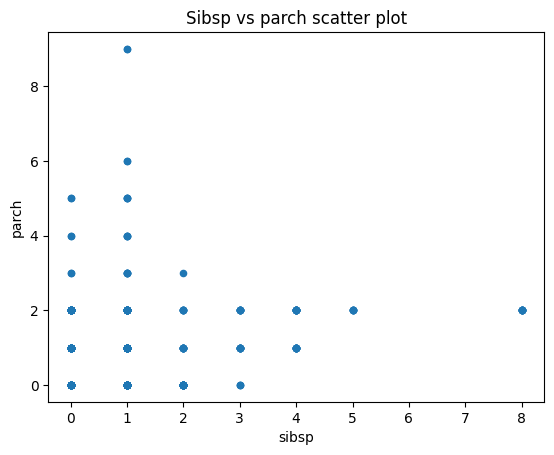

In [69]:
# scatter plot of sibsp vs parch

titanic_df.plot(
    kind="scatter",
    x="sibsp",
    y="parch",
    title="Sibsp vs parch scatter plot",
);

##### sibsp vs fare

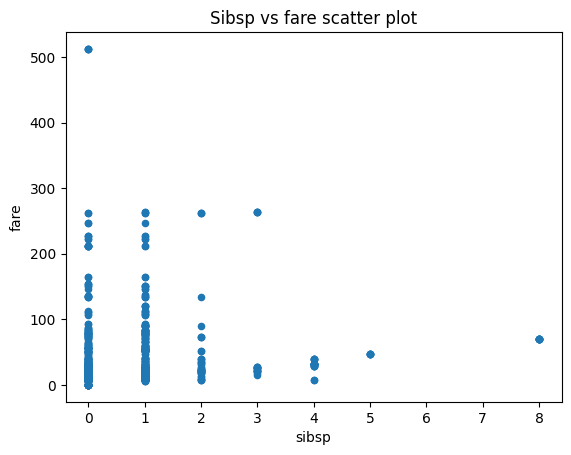

In [70]:
# scatter plot of sibsp vs fare

titanic_df.plot(
    kind="scatter",
    x="sibsp",
    y="fare",
    title="Sibsp vs fare scatter plot",
);

##### parch vs fare

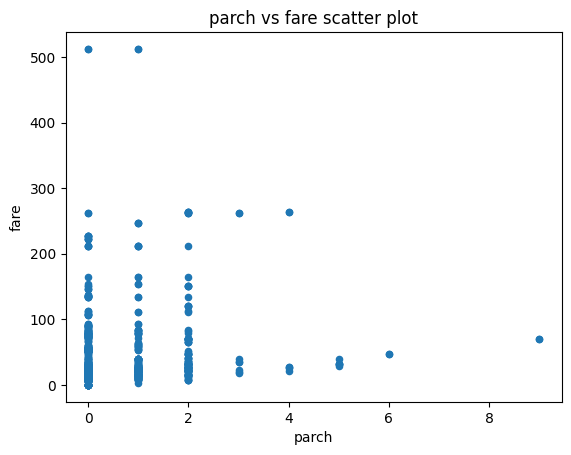

In [71]:
# scatter plot of parch vs fare

titanic_df.plot(
    kind="scatter",
    x="parch",
    y="fare",
    title="parch vs fare scatter plot",
);

#### Categorical vs Categorical Variables

##### pclass vs sex

In [72]:
column_1 = "pclass"
column_2 = "sex"

(
    pd.crosstab(titanic_df[column_1], titanic_df[column_2], margins=True)
    .style.background_gradient(cmap="coolwarm")
    .set_caption(f"{column_1} vs {column_2} Heatmap")
)

sex,female,male,All
pclass,,,
3,216,493,709
2,106,171,277
1,144,179,323
All,466,843,1309


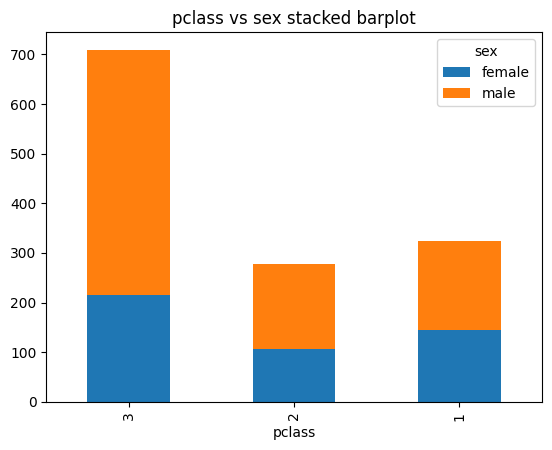

In [73]:
(
    pd.crosstab(titanic_df[column_1], titanic_df[column_2]).plot(
        kind="bar", stacked=True, title=f"{column_1} vs {column_2} stacked barplot"
    )
);

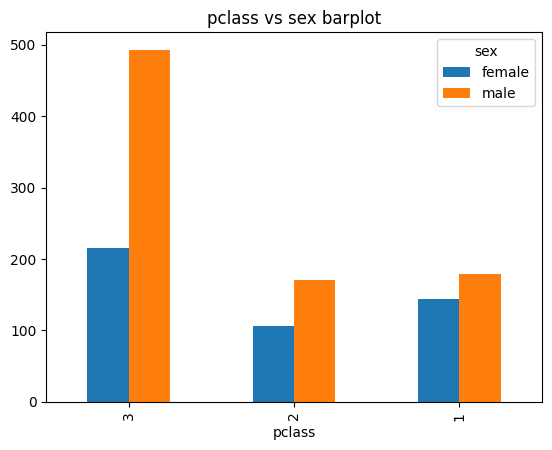

In [74]:
(
    pd.crosstab(titanic_df[column_1], titanic_df[column_2]).plot(
        kind="bar",
        title=f"{column_1} vs {column_2} barplot",
    )
);

##### pclass vs embarked

In [75]:
column_1 = "pclass"
column_2 = "embarked"

(
    pd.crosstab(titanic_df[column_1], titanic_df[column_2], margins=True)
    .style.background_gradient(cmap="coolwarm")
    .set_caption(f"{column_1} vs {column_2} Heatmap")
)

embarked,C,Q,S,All
pclass,,,,
3,101,113,495,709
2,28,7,242,277
1,141,3,177,321
All,270,123,914,1307


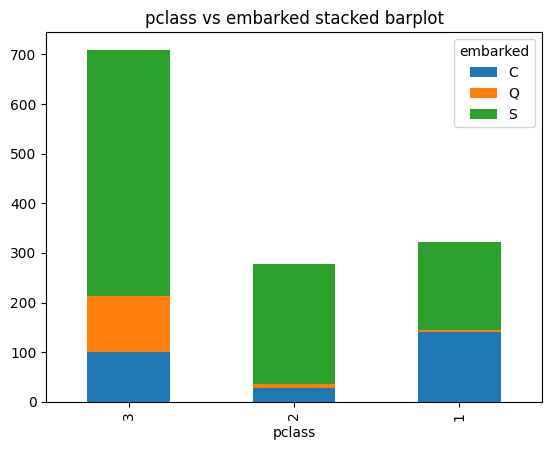

In [76]:
(
    pd.crosstab(titanic_df[column_1], titanic_df[column_2]).plot(
        kind="bar", stacked=True, title=f"{column_1} vs {column_2} stacked barplot"
    )
);

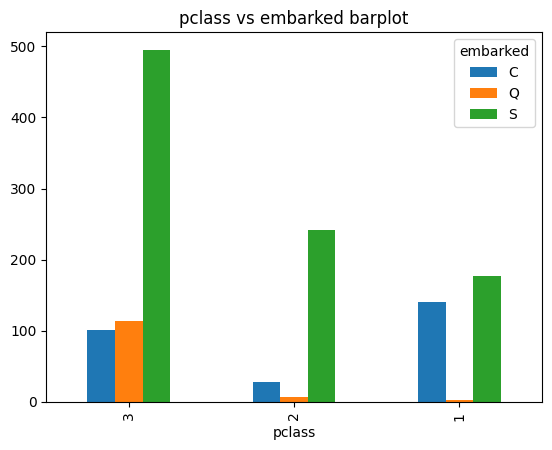

In [77]:
(
    pd.crosstab(titanic_df[column_1], titanic_df[column_2]).plot(
        kind="bar",
        title=f"{column_1} vs {column_2} barplot",
    )
);

##### sex vs embarked

In [78]:
column_1 = "sex"
column_2 = "embarked"

(
    pd.crosstab(titanic_df[column_1], titanic_df[column_2], margins=True)
    .style.background_gradient(cmap="coolwarm")
    .set_caption(f"{column_1} vs {column_2} Heatmap")
)

embarked,C,Q,S,All
sex,,,,
female,113,60,291,464
male,157,63,623,843
All,270,123,914,1307


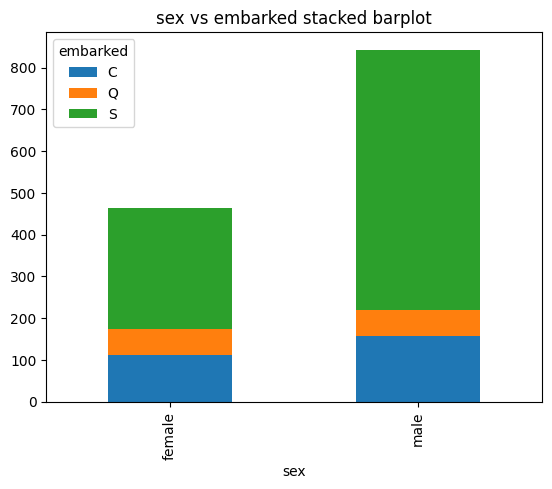

In [79]:
(
    pd.crosstab(titanic_df[column_1], titanic_df[column_2]).plot(
        kind="bar", stacked=True, title=f"{column_1} vs {column_2} stacked barplot"
    )
);

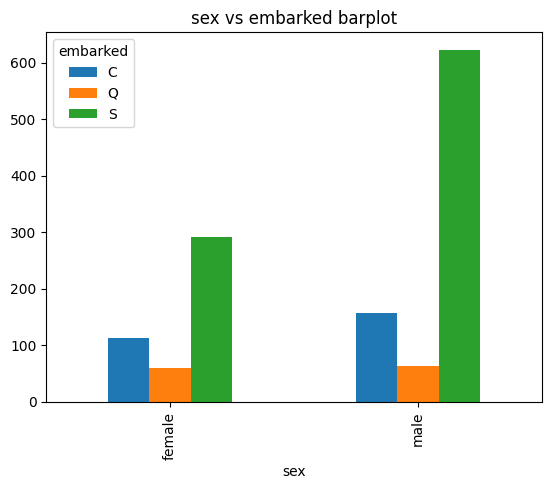

In [80]:
(
    pd.crosstab(titanic_df[column_1], titanic_df[column_2]).plot(
        kind="bar",
        title=f"{column_1} vs {column_2} barplot",
    )
);

##### sex vs pclass

In [81]:
column_1 = "sex"
column_2 = "pclass"

(
    pd.crosstab(titanic_df[column_1], titanic_df[column_2], margins=True)
    .style.background_gradient(cmap="coolwarm")
    .set_caption(f"{column_1} vs {column_2} Heatmap")
)

pclass,3,2,1,All
sex,,,,
female,216,106,144,466
male,493,171,179,843
All,709,277,323,1309


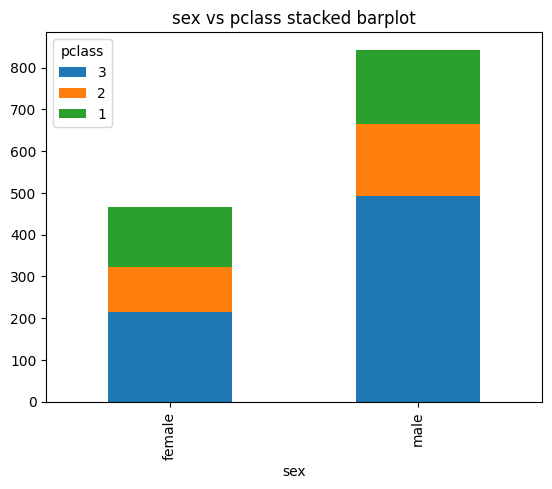

In [82]:
(
    pd.crosstab(titanic_df[column_1], titanic_df[column_2]).plot(
        kind="bar", stacked=True, title=f"{column_1} vs {column_2} stacked barplot"
    )
);

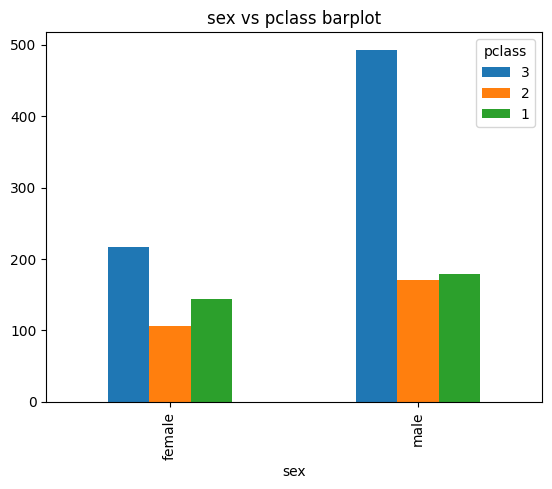

In [83]:
(
    pd.crosstab(titanic_df[column_1], titanic_df[column_2]).plot(
        kind="bar",
        title=f"{column_1} vs {column_2} barplot",
    )
);

##### embarked vs pclass

In [84]:
column_1 = "embarked"
column_2 = "pclass"

(
    pd.crosstab(titanic_df[column_1], titanic_df[column_2], margins=True)
    .style.background_gradient(cmap="coolwarm")
    .set_caption(f"{column_1} vs {column_2} Heatmap")
)

pclass,3,2,1,All
embarked,,,,
C,101,28,141,270
Q,113,7,3,123
S,495,242,177,914
All,709,277,321,1307


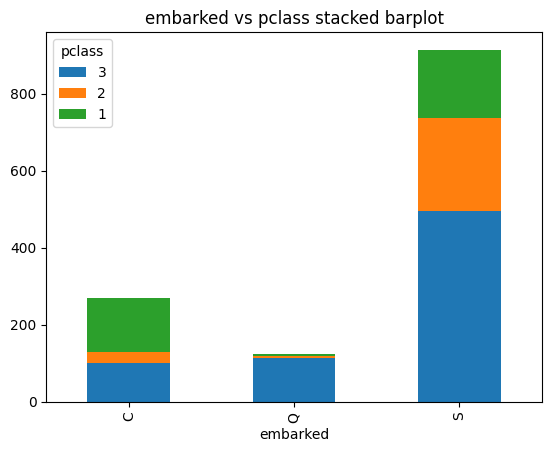

In [85]:
(
    pd.crosstab(titanic_df[column_1], titanic_df[column_2]).plot(
        kind="bar", stacked=True, title=f"{column_1} vs {column_2} stacked barplot"
    )
);

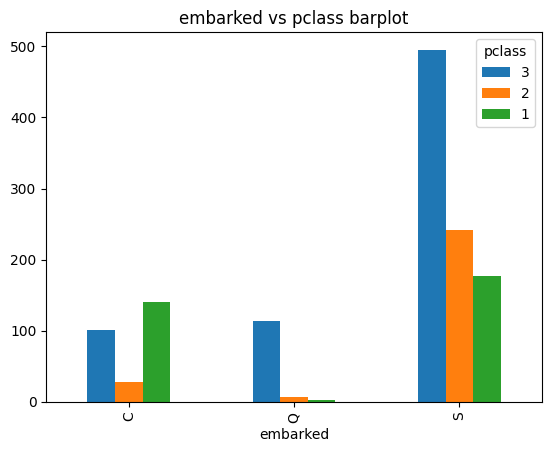

In [86]:
(
    pd.crosstab(titanic_df[column_1], titanic_df[column_2]).plot(
        kind="bar",
        title=f"{column_1} vs {column_2} barplot",
    )
);

##### embarked vs sex

In [87]:
column_1 = "embarked"
column_2 = "sex"

(
    pd.crosstab(titanic_df[column_1], titanic_df[column_2], margins=True)
    .style.background_gradient(cmap="coolwarm")
    .set_caption(f"{column_1} vs {column_2} Heatmap")
)

sex,female,male,All
embarked,,,
C,113,157,270
Q,60,63,123
S,291,623,914
All,464,843,1307


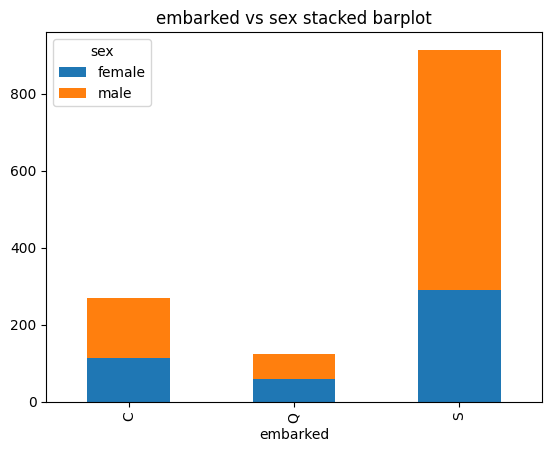

In [88]:
(
    pd.crosstab(titanic_df[column_1], titanic_df[column_2]).plot(
        kind="bar", stacked=True, title=f"{column_1} vs {column_2} stacked barplot"
    )
);

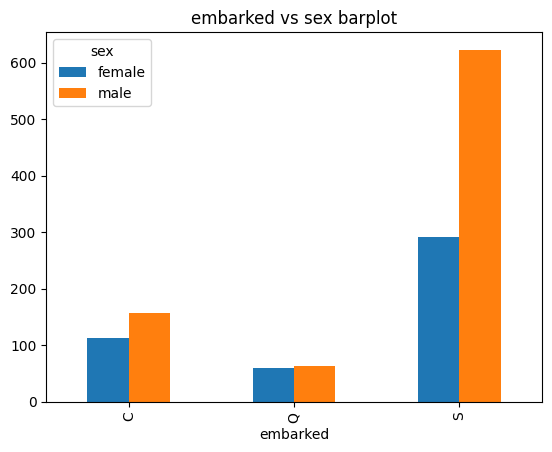

In [89]:
(
    pd.crosstab(titanic_df[column_1], titanic_df[column_2]).plot(
        kind="bar",
        title=f"{column_1} vs {column_2} barplot",
    )
);

#### Categorical vs Numerical Variables

##### pclass vs age

/tmp/ipykernel_48012/3052370305.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  titanic_df.plot(


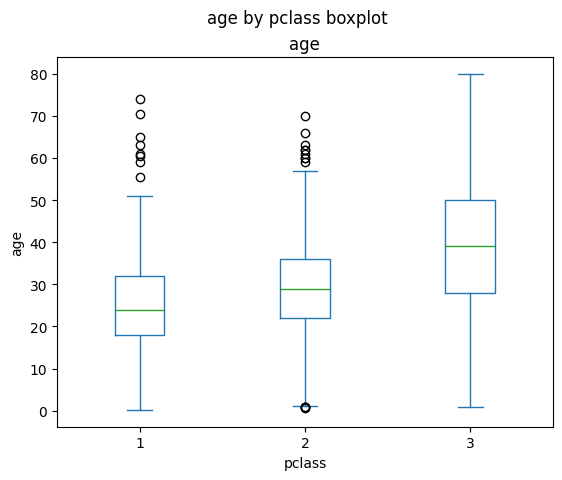

In [90]:
column_cat = "pclass"
column_num = "age"

titanic_df.plot(
    kind="box",
    column=column_num,
    by=column_cat,
    xlabel=column_cat,
    ylabel=column_num,
    title=f"{column_num} by {column_cat} boxplot",
    grid=False,
);

##### pclass vs sibsp

/tmp/ipykernel_48012/2525679634.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  titanic_df.plot(


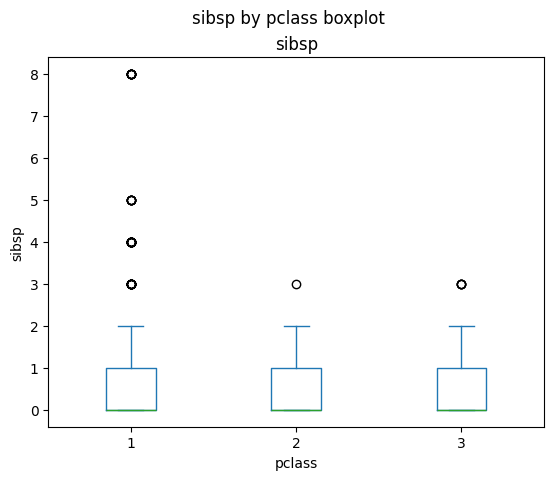

In [91]:
column_num = "sibsp"

titanic_df.plot(
    kind="box",
    column=column_num,
    by=column_cat,
    xlabel=column_cat,
    ylabel=column_num,
    title=f"{column_num} by {column_cat} boxplot",
    grid=False,
);

##### pclass vs parch

/tmp/ipykernel_48012/3240135496.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  titanic_df.plot(


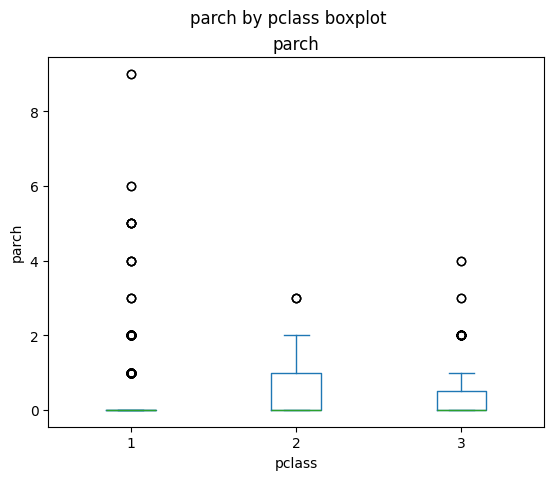

In [92]:
column_num = "parch"

titanic_df.plot(
    kind="box",
    column=column_num,
    by=column_cat,
    xlabel=column_cat,
    ylabel=column_num,
    title=f"{column_num} by {column_cat} boxplot",
    grid=False,
);

##### pclass vs fare

/tmp/ipykernel_48012/3704489146.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  titanic_df.plot(


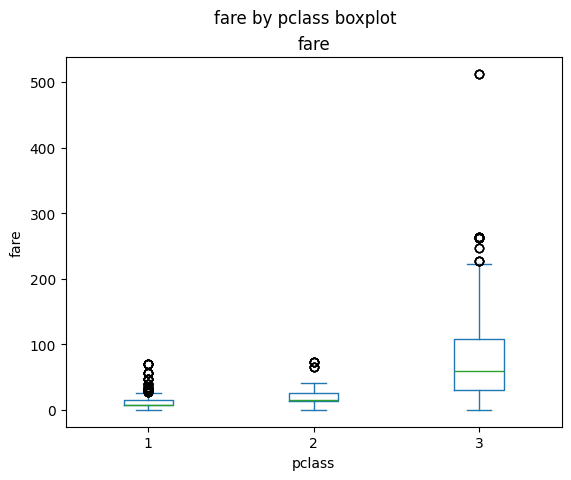

In [93]:
column_num = "fare"

titanic_df.plot(
    kind="box",
    column=column_num,
    by=column_cat,
    xlabel=column_cat,
    ylabel=column_num,
    title=f"{column_num} by {column_cat} boxplot",
    grid=False,
);

##### sex vs age

/tmp/ipykernel_48012/2514477341.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  titanic_df.plot(


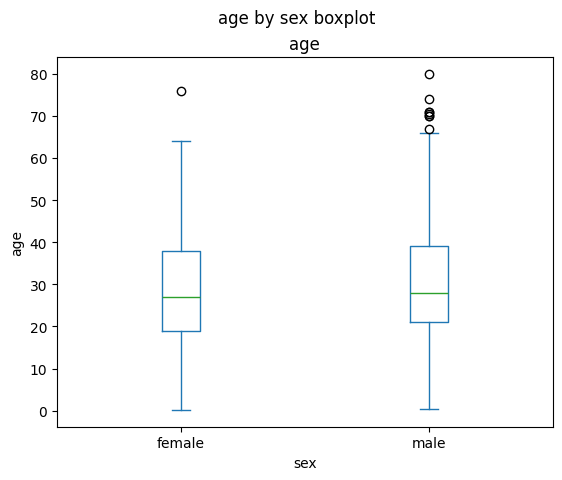

In [94]:
column_cat = "sex"
column_num = "age"

titanic_df.plot(
    kind="box",
    column=column_num,
    by=column_cat,
    xlabel=column_cat,
    ylabel=column_num,
    title=f"{column_num} by {column_cat} boxplot",
    grid=False,
);

##### sex vs sibsp

/tmp/ipykernel_48012/2525679634.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  titanic_df.plot(


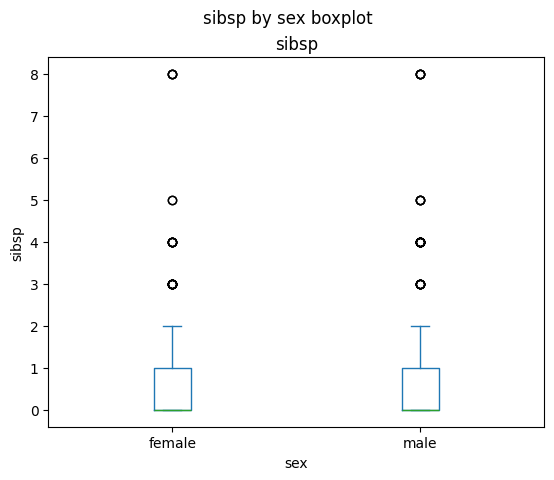

In [95]:
column_num = "sibsp"

titanic_df.plot(
    kind="box",
    column=column_num,
    by=column_cat,
    xlabel=column_cat,
    ylabel=column_num,
    title=f"{column_num} by {column_cat} boxplot",
    grid=False,
);

##### sex vs parch

/tmp/ipykernel_48012/3240135496.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  titanic_df.plot(


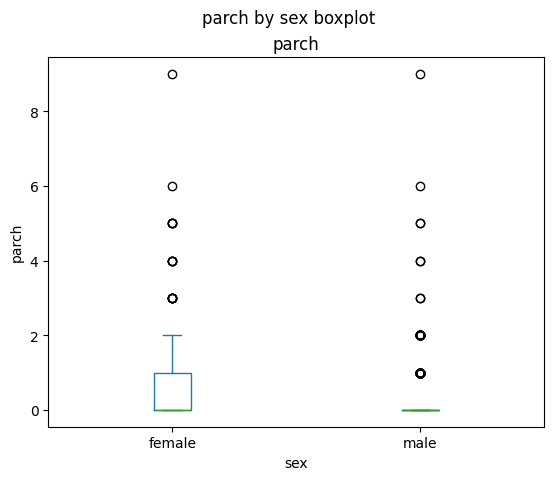

In [96]:
column_num = "parch"

titanic_df.plot(
    kind="box",
    column=column_num,
    by=column_cat,
    xlabel=column_cat,
    ylabel=column_num,
    title=f"{column_num} by {column_cat} boxplot",
    grid=False,
);

##### sex vs fare

/tmp/ipykernel_48012/3704489146.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  titanic_df.plot(


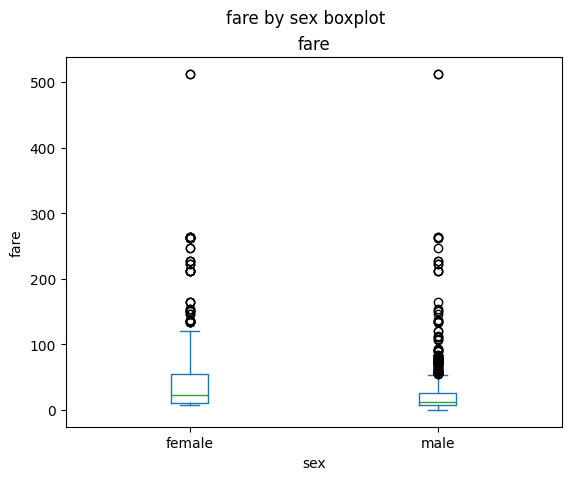

In [97]:
column_num = "fare"

titanic_df.plot(
    kind="box",
    column=column_num,
    by=column_cat,
    xlabel=column_cat,
    ylabel=column_num,
    title=f"{column_num} by {column_cat} boxplot",
    grid=False,
);

##### embarked vs age

/tmp/ipykernel_48012/3272847361.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  titanic_df.plot(


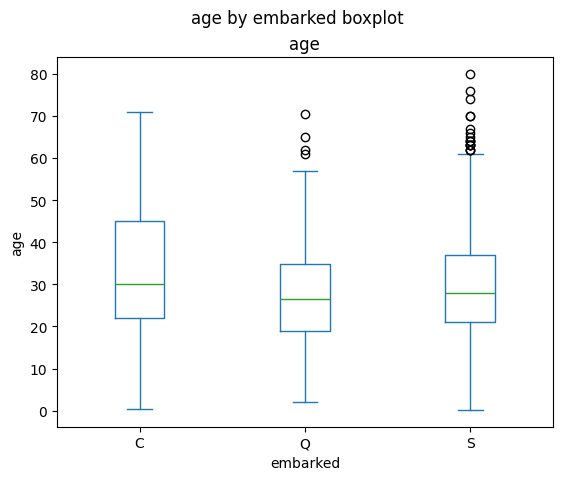

In [98]:
column_cat = "embarked"
column_num = "age"

titanic_df.plot(
    kind="box",
    column=column_num,
    by=column_cat,
    xlabel=column_cat,
    ylabel=column_num,
    title=f"{column_num} by {column_cat} boxplot",
    grid=False,
);

##### embarked vs sibsp

/tmp/ipykernel_48012/2525679634.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  titanic_df.plot(


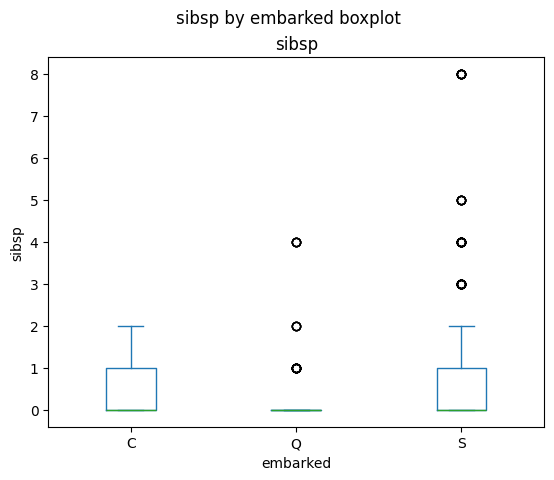

In [99]:
column_num = "sibsp"

titanic_df.plot(
    kind="box",
    column=column_num,
    by=column_cat,
    xlabel=column_cat,
    ylabel=column_num,
    title=f"{column_num} by {column_cat} boxplot",
    grid=False,
);

##### embarked vs parch

/tmp/ipykernel_48012/3240135496.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  titanic_df.plot(


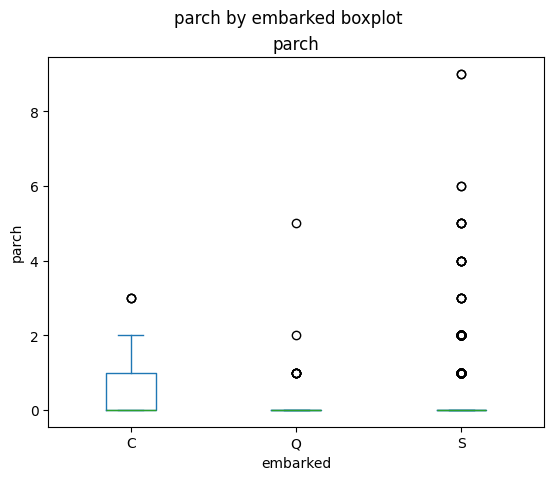

In [100]:
column_num = "parch"

titanic_df.plot(
    kind="box",
    column=column_num,
    by=column_cat,
    xlabel=column_cat,
    ylabel=column_num,
    title=f"{column_num} by {column_cat} boxplot",
    grid=False,
);

##### embarked vs fare

/tmp/ipykernel_48012/3704489146.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  titanic_df.plot(


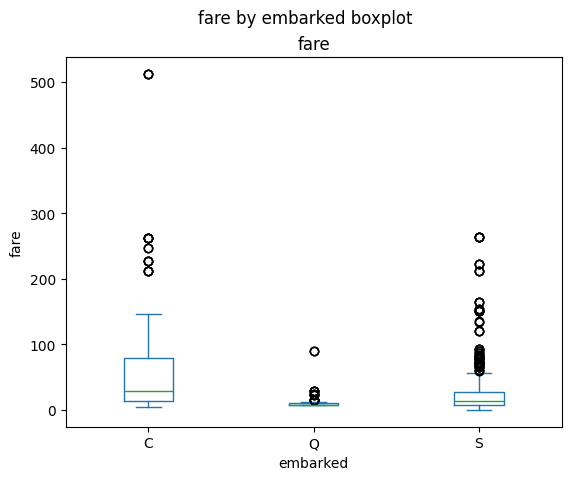

In [101]:
column_num = "fare"

titanic_df.plot(
    kind="box",
    column=column_num,
    by=column_cat,
    xlabel=column_cat,
    ylabel=column_num,
    title=f"{column_num} by {column_cat} boxplot",
    grid=False,
);

### 📈  Multivariate Analysis

Is important to check the relationship between the target variable and multiple variables.

The target variable is `Survived`

## 📊 Analysis of Results and Conclusions 



## 💡 Proposals and Ideas




## 📖 References

Visualización

- <https://joserzapata.github.io/courses/python-ciencia-datos/visualizacion/#visualizacion-con-pandas>
- <https://joserzapata.github.io/courses/python-ciencia-datos/visualizacion/plotly/>
- <https://joserzapata.github.io/courses/python-ciencia-datos/visualizacion/seaborn/>

EDA
- <https://www.analyticsvidhya.com/blog/2022/02/a-quick-guide-to-bivariate-analysis-in-python/>
- <https://www.kaggle.com/code/allohvk/titanic-advanced-eda>
- <https://www.kaggle.com/code/imkushwaha/bivariate-multivariate-analysis>

Statistical tests

- <https://nathanrosidi.medium.com/commonly-used-statistical-tests-in-data-science-93787568eb36>